In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## Data Cleaning

In [32]:
dforiginal = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')
dforiginal.head(10)

/var/folders/8p/zyr5g87n1_5bsq92yv67mmzc0000gn/T/ipykernel_70370/4058506279.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dforiginal = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
5,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
6,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
7,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [33]:
dforiginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [34]:
dforiginal['InvoiceDate'] = pd.to_datetime(dforiginal['InvoiceDate'])

/var/folders/8p/zyr5g87n1_5bsq92yv67mmzc0000gn/T/ipykernel_70370/2436009276.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dforiginal['InvoiceDate'] = pd.to_datetime(dforiginal['InvoiceDate'])


In [35]:
# Check missing value
dforiginal.replace('', pd.NA, inplace=True)
dforiginal.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [36]:
# Drop duplicated entries
dforiginal = dforiginal.drop_duplicates()

In [37]:
dforiginal[dforiginal['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2380,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom
4310,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom
7105,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7106,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7107,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541904,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541905,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541906,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541907,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [38]:
dforiginal[dforiginal['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
613,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1958,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
1959,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1960,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1961,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
529253,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,NaN,United Kingdom
529302,581408,85175,NaN,20,2011-12-08 14:06:00,0.00,NaN,United Kingdom
529654,581422,23169,smashed,-235,2011-12-08 15:24:00,0.00,NaN,United Kingdom
532619,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [39]:
# Make a copy, ready to clean up dataset
df = dforiginal.copy()

In [40]:
# Drop unreasonable/unrelated data
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[~df['StockCode'].isin(['B', 'm', 'M', 'AMAZONFEE'])]

In [41]:
df = df.reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
524553,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
524554,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
524555,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
524556,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France


In [42]:
df.groupby("StockCode")['Description'].nunique()

StockCode
10002           1
10080           1
10120           1
10123C          1
10124A          1
               ..
gift_0001_10    1
gift_0001_20    1
gift_0001_30    1
gift_0001_40    1
gift_0001_50    1
Name: Description, Length: 3918, dtype: int64

In [43]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [44]:
# Add additional columns for analysis

# Year
df['Year'] = df['InvoiceDate'].dt.year

# Month (1-12)
df['Month'] = df['InvoiceDate'].dt.month

# Date (day of month, 1-31)
df['Day'] = df['InvoiceDate'].dt.day

# Day of Week (Monday=0, Sunday=6)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Time of day
df['TimeOfDay'] = df['InvoiceDate'].dt.time

# Quarter
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Quarter'] = df['Month'].apply(get_season)

# Revenue (Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [45]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,DayOfWeek,TimeOfDay,Quarter,Revenue
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524553,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011,12,9,4,12:50:00,Winter,23.40
524554,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,4,12:50:00,Winter,10.20
524555,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,2011,12,9,4,12:50:00,Winter,19.80
524556,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,2011,12,9,4,12:50:00,Winter,19.80


## Exploratory Data Analysis (EDA)

### Seasonality Trends

In [46]:
df.groupby('Year')['Month'].unique()

Year
2010                                       [12]
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: Month, dtype: object

In [47]:
# Quantity sold by Month
def quantity_sold_trend(df, product):
    product_df = df[df['Description'] == product]
    
    trend = product_df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
    trend['YearMonth'] = pd.to_datetime(trend[['Year', 'Month']].assign(DAY=1))
    
    # Plotting
    plt.figure(figsize=(8,4))
    plt.plot(trend['YearMonth'], trend['Quantity'], marker='o')
    plt.title(f'Long-term Seasonality of {product} Sales')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

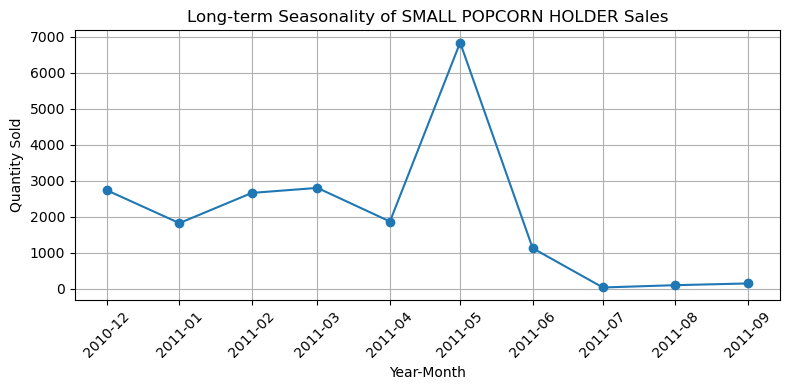

In [48]:
quantity_sold_trend(df, 'SMALL POPCORN HOLDER')

**Observasions:**

- Moderate sales (~2000-3000 units) for most months.
- Huge spike in May 2011 (~6800 units), indicating either a promotion, event-driven demand, or seasonal peak.
- Sharp drop right after May 2011, with almost no sales from July onward.

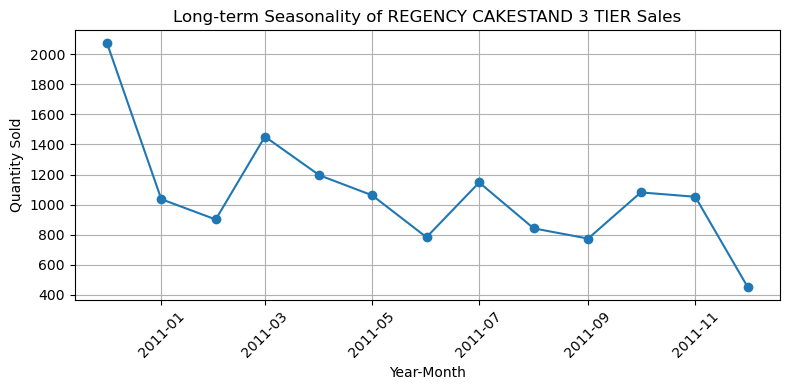

In [49]:
quantity_sold_trend(df, 'REGENCY CAKESTAND 3 TIER')

**Observations:**

- Sales peak at ~2100 units in January 2011, suggests a strong launch or seasonal need early in the year
- After January, sales steadily decrease with occasional upticks but no return to the initial peak.
- Sales fall to their lowest (~400 units) by December 2011.


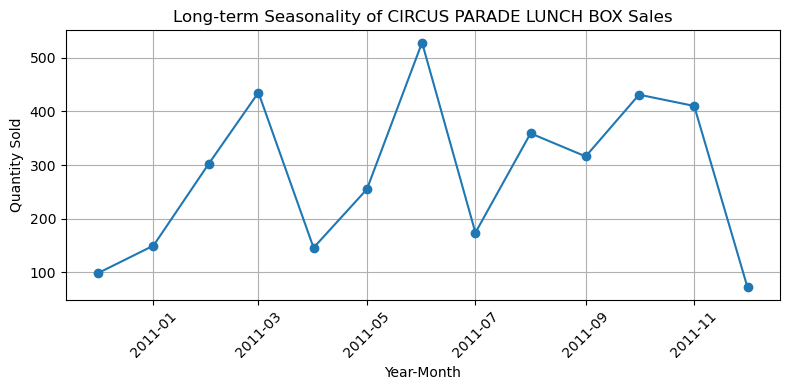

In [50]:
quantity_sold_trend(df, 'CIRCUS PARADE LUNCH BOX')

**Observations:**

- This product shows clear cyclical demand, potentially tied to school terms, gift seasons, or promotions.
- Major peaks in March, June, and October, suggesting high-demand periods.
- Even after dips, sales rebound regularly, indicating ongoing interest.

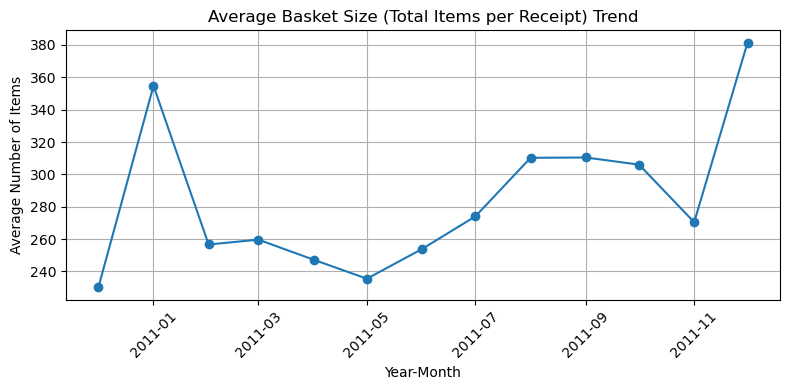

In [51]:
# Basket size by Month
def basket_size_trend(data):
    basket_sizes = data.groupby(['InvoiceNo', 'InvoiceDate'])['Quantity'].sum().reset_index()
    basket_sizes['YearMonth'] = basket_sizes['InvoiceDate'].dt.to_period('M')
    
    basket_trend = basket_sizes.groupby('YearMonth')['Quantity'].mean().reset_index()

    basket_trend['YearMonth'] = basket_trend['YearMonth'].dt.to_timestamp()
    
    # Plotting
    plt.figure(figsize=(8,4))
    plt.plot(basket_trend['YearMonth'], basket_trend['Quantity'], marker='o')
    plt.title('Average Basket Size (Total Items per Receipt) Trend')
    plt.xlabel('Year-Month')
    plt.ylabel('Average Number of Items')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

basket_size_trend(df)

**Observaations:**

- Starts at ~230 items (Jan), spikes to ~355 (Feb), then drops back down around ~260-240 between March to May.
- From June to September, there’s a gradual increase in basket size, stabilizing around 310 items.
- December shows a sharp rise to 380 items per basket, the highest point of the year, likely due to holiday season bulk buying.

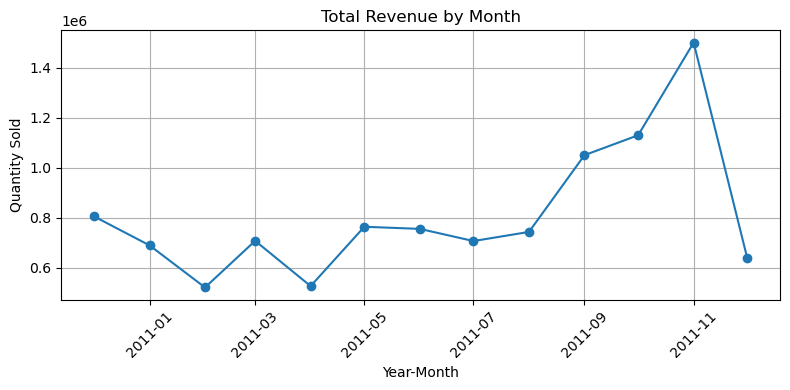

In [52]:
# Total Revenue by Month
def revenue_trend(df):   
    trend = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
    trend['YearMonth'] = pd.to_datetime(trend[['Year', 'Month']].assign(DAY=1))
    
    # Plotting
    plt.figure(figsize=(8,4))
    plt.plot(trend['YearMonth'], trend['Revenue'], marker='o')
    plt.title(f'Total Revenue by Month')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

revenue_trend(df)

**Observations:**

- Peak in November highlights the importance of holiday-driven sales.
- The September to November build-up suggests early holiday shopping behavior or strategic campaigns leading up to year-end.
- Consistent low points in May and early-year months indicate potential off-seasons.

### Monthly Analysis (December 2010)

In [53]:
# Filter data for the selected year and month
df_new = df[(df['Year'] == 2010) & (df['Month'] == 12)]

# Products that sold the most
df_new.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(5)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     5195
21212      PACK OF 72 RETROSPOT CAKE CASES       4106
85123A     WHITE HANGING HEART T-LIGHT HOLDER    3752
22834      HAND WARMER BABUSHKA DESIGN           3476
22197      SMALL POPCORN HOLDER                  2737
Name: Quantity, dtype: int64

In [54]:
# Products that sold the least
df_new.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values().head(5)

StockCode     Description                       
gift_0001_50  Dotcomgiftshop Gift Voucher �50.00    1
21196         ROUND WHITE CONFETTI IN TUBE          1
90142D        MOP PENDANT SHELL NECKLACE            1
90144         SILVER DROP EARRINGS WITH FLOWER      1
84816         DANISH ROSE BEDSIDE CABINET           1
Name: Quantity, dtype: int64

In [55]:
# Products that generated the most revenue
df_new.groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values(ascending=False).head(5)

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              27694.76
DOT        DOTCOM POSTAGE                        24671.19
85123A     WHITE HANGING HEART T-LIGHT HOLDER    10435.36
84029E     RED WOOLLY HOTTIE WHITE HEART.         9291.73
22086      PAPER CHAIN KIT 50'S CHRISTMAS         9208.10
Name: Revenue, dtype: float64

In [56]:
# Products that generated the least revenue
df_new.groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values().head(5)

StockCode  Description                     
71215      METAL BASE FOR CANDLES              0.42
79151B     SILICON CUBE 25W, BLUE              0.42
79149B     SILICON STAR BULB  BLUE             0.42
47422      ASSORTED MONKEY SUCTION CUP HOOK    0.42
10123C     HEARTS WRAPPING TAPE                0.65
Name: Revenue, dtype: float64

In [57]:
# Customers who bought the most
df_new.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(5)

CustomerID
15061.0    9171
16029.0    7956
14646.0    6714
18102.0    6695
17511.0    6426
Name: Quantity, dtype: int64

In [64]:
# Most popular days of the week
dof_df = df_new.groupby('DayOfWeek')['Quantity'].count().sort_values(ascending=False)
dof_df

DayOfWeek
4    7896
0    7686
3    7458
2    7063
1    6377
6    4477
Name: Quantity, dtype: int64

In [ ]:
# Most popular times for purchase during the week
df_new.groupby('TimeOfDay')['Quantity'].count().sort_values(ascending=False).head(5)

TimeOfDay
16:57:00    721
14:09:00    701
14:25:00    692
14:41:00    664
14:59:00    646
Name: Quantity, dtype: int64

In [ ]:
# Regions that earned the most money
df_new.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)

Country
United Kingdom    730060.63
Germany            15205.74
EIRE               10033.26
France              9616.31
Netherlands         8784.48
Name: Revenue, dtype: float64

### Specific Product Analysis

In [109]:
# Select product
product_df = df[df['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'][df['Year'] == 2011]

# Quantity sold by Country
country_sales = product_df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
country_sales

/var/folders/8p/zyr5g87n1_5bsq92yv67mmzc0000gn/T/ipykernel_70370/4028167385.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  product_df = df[df['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'][df['Year'] == 2011]


Country
United Kingdom    44859
Sweden             1728
EIRE                816
Japan               577
France              528
Canada              288
Spain               240
Denmark             144
Hong Kong           144
Switzerland         144
Germany              96
Unspecified          96
Norway               48
Portugal             48
Name: Quantity, dtype: int64

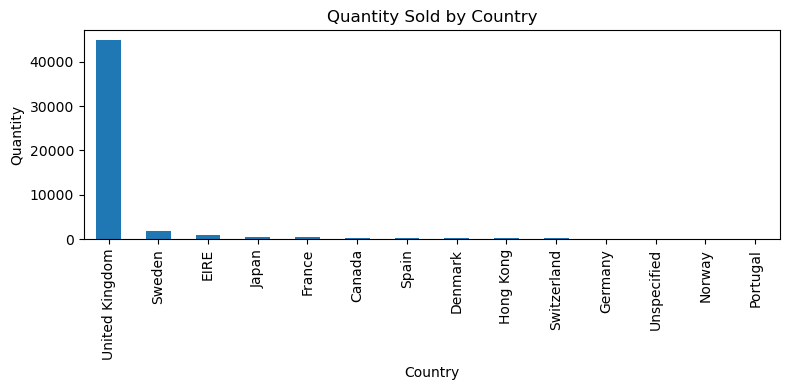

In [110]:
plt.figure(figsize=(8,4))
country_sales.plot(kind='bar')
plt.title('Quantity Sold by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [111]:
# Quantity sold by Month
month_sales = product_df.groupby('Month')['Quantity'].sum()
month_sales

Month
1      1492
2      3518
3      3888
4     10239
5      4949
6      2122
7      3762
8      2261
9      3515
10     8084
11     4559
12     1367
Name: Quantity, dtype: int64

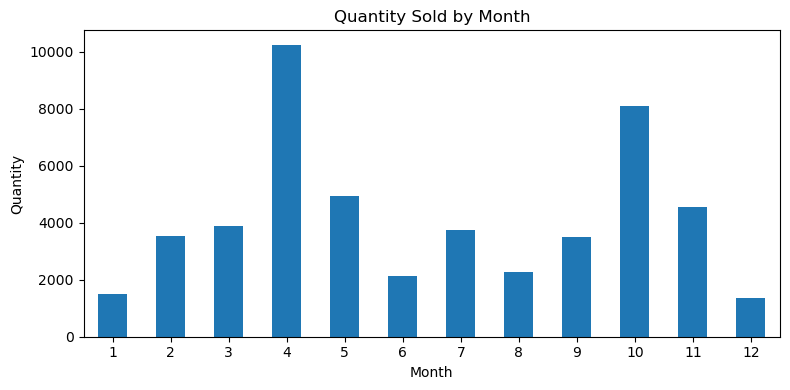

In [112]:
plt.figure(figsize=(8,4))
month_sales.plot(kind='bar')
plt.title('Quantity Sold by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [113]:
# Quantity sold by Day of Week
day_sales = product_df.groupby('DayOfWeek')['Quantity'].sum().sort_index()
day_sales

DayOfWeek
0     6107
1     7686
2    10075
3    14828
4     7748
6     3312
Name: Quantity, dtype: int64

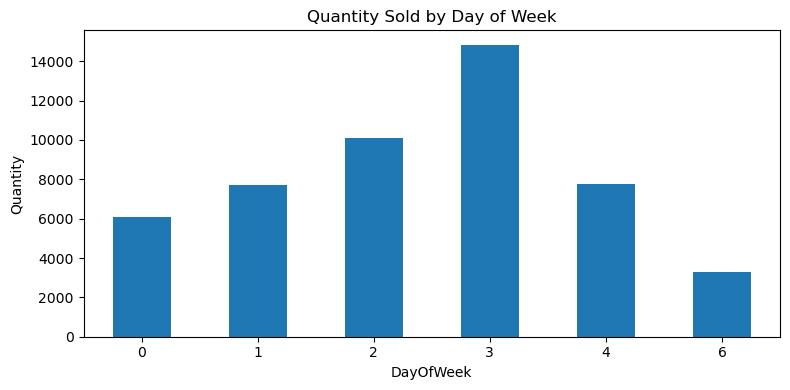

In [114]:
plt.figure(figsize=(8,4))
day_sales.plot(kind='bar')
plt.title('Quantity Sold by Day of Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [115]:
# Total Quantity Sold
product_df['Quantity'].sum()

49756

In [116]:
# Total Revenue Generated
product_df['Revenue'].sum()

12639.88

### Customer Insights

- **Holiday-Driven Buying Spikes:**
    - Revenue and basket sizes peak in November, suggesting holiday shopping behavior (likely Christmas or end-of-year gifting).
    - Customers buy more items per receipt during this period, contributing to higher overall basket value.

- **Post-Holiday Drop:**
    - Revenue and average basket sizes drop significantly after the holidays (January-February).
    - Customers likely reduce spending after heavy end-of-year purchases.

- **Mid-Year Stability with Occasional Upticks:**
    - Revenue and basket sizes stabilize mid-year, with moderate increases in some months (likely linked to summer events or school breaks).
    - Certain products (e.g., lunch boxes, home décor) show cyclical demand.


### Geographical Analysis

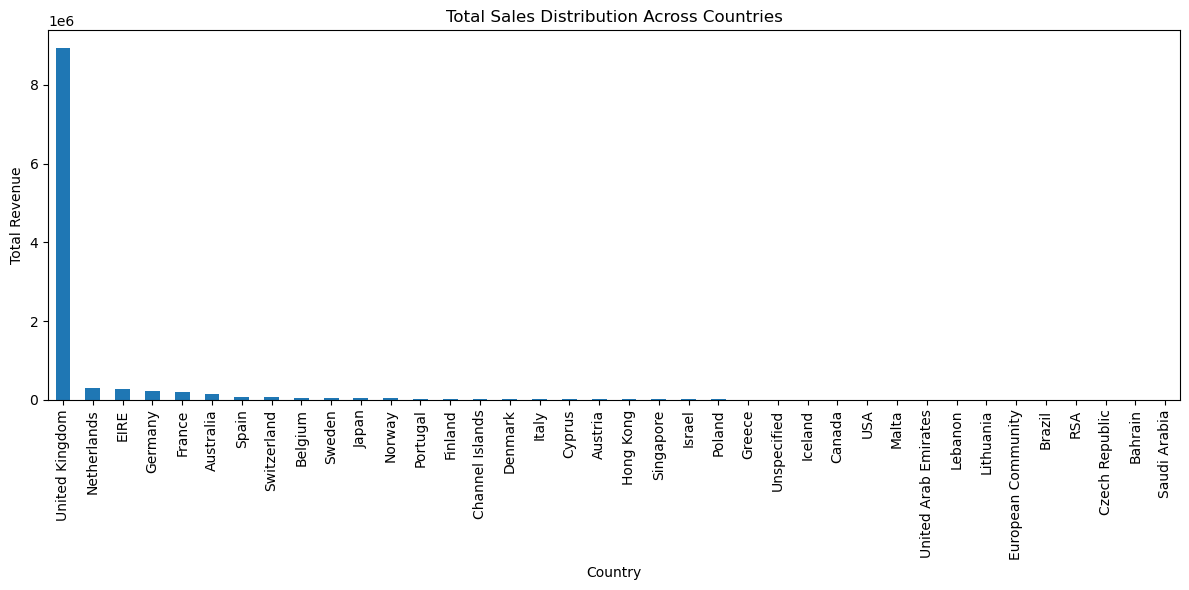

In [ ]:
# distribution of sales across countries
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
country_sales.plot(kind='bar')
plt.title('Total Sales Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**

United Kingdom dominates sales, with much smaller contributions from other countries.

### Products Ranking

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Total Quantity it will sell in the next 3 months
model = ExponentialSmoothing(month_sales, trend='additive', seasonal='additive', seasonal_periods=6, initialization_method="estimated")
model_fit = model.fit()

forecast = model_fit.forecast(3)
forecast, forecast.sum()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(12    1168.398528
 13    2941.206797
 14    3329.741248
 dtype: float64,
 7439.346572845196)

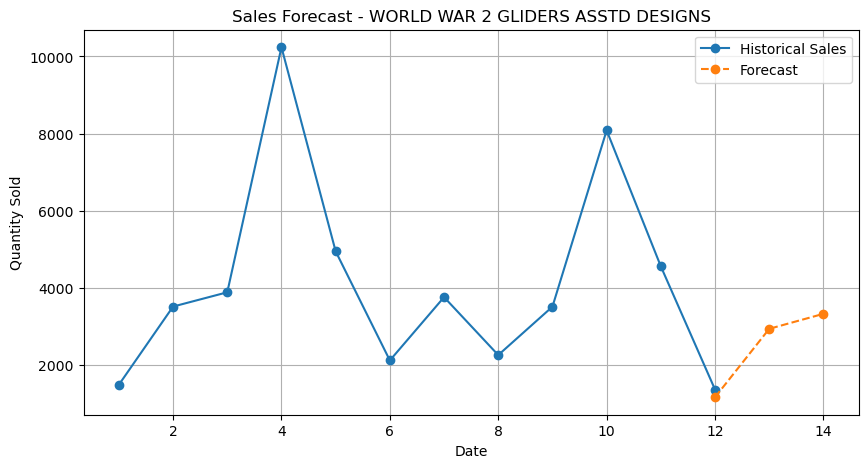

In [107]:
plt.figure(figsize=(10,5))
plt.plot(month_sales, label='Historical Sales', marker='o')
plt.plot(forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Sales Forecast - WORLD WAR 2 GLIDERS ASSTD DESIGNS')
plt.ylabel('Quantity Sold')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()